# 01 - Neuroimaging File Formats




Understanding MRI data can be tricky. Here, we'll have a look at how MRI data gets from the scanner to the computer, how it is stored and how we can make sense of it.

*Questions*

- How is MRI data stored?
- How can we convert different file formats?
- What are Nipype interfaces? What's the difference to using the command line?

*Objective*

- Convert DICOM files to NIfTI (both using the command line and nipype)

---

## Overview of neuroimaging file formats

There are different file formats to store MRI data. The most common ones are:

- **DICOM (.dcm)**:            Digital Imaging and Communications in Medicine
- **NIfTI (.nii or .nii.gz)**: Neuroimaging Informatics Technology Initiative
- **Analyze (.img and .hdr)**
- **Minc (.minc)**

For most scanners, images are initally collected in the DICOM format. Importantly, DICOM saves one file per slice. Thus, a prolonged scanning session may result in hundreds or thousands of single files. This is how it looks (note that every file is named with a unique identifier):

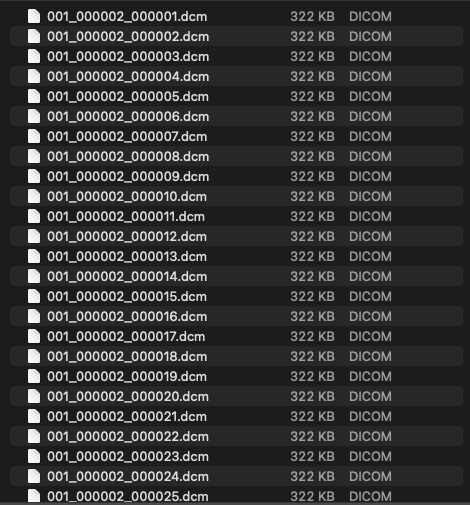

Performing complex operations on the MRI data, however, can be complicated with thousands of single files. That's why it's common to convert the DICOM files to a single NIfTI file as first step of data processing. One tool that can be used for this job is ```dcm2niix```. More information can be found [here](https://github.com/rordenlab/dcm2niix).

## Converting between neuroimaging file formats

### Setting up the environment

If you're running this notebook on Google colab, you can download a sample dicom dataset (downloaded from [here](https://wiki.idoimaging.com/index.php?title=Sample_Data)) and install ```dcm2niix``` by executing the two cells below (note that the ```!``` indicates a shell command)

In [1]:
# download dicom data
!mkdir /content/dicomdata
!wget https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_02_lee.zip --no-check-certificate
!unzip 1010_brain_mr_02_lee.zip -d /content/dicomdata

# install packages
!pip install nipype
!pip install nilearn

# install dcm2niix
!sudo apt-get install dcm2niix

--2023-10-12 07:51:54--  https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_02_lee.zip
Resolving data.idoimaging.com (data.idoimaging.com)... 18.172.122.16, 18.172.122.127, 18.172.122.44, ...
Connecting to data.idoimaging.com (data.idoimaging.com)|18.172.122.16|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 8524230 (8.1M) [application/zip]
Saving to: ‘1010_brain_mr_02_lee.zip’

1010_brain_mr_02_le 100%[===================>]   8.13M  --.-KB/s    in 0.1s    

2023-10-12 07:51:54 (66.7 MB/s) - ‘1010_brain_mr_02_lee.zip’ saved [8524230/8524230]

Archive:  1010_brain_mr_02_lee.zip
   creating: /content/dicomdata/1010_brain_mr_02_lee/
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_000.dcm  
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_001.dcm  
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_002.dcm  
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_003.dcm  
  inflating: /content/d

In the cell above we
 - create a new directory for the dicom data (using ```mkdir```)
 - download the dicom data (using ```wget```)
 - unzip the compressed data (using the ```unzip```) function. The ```-d``` specifies the destination of the unzipped files, namely the directory we created in the first step

 Furthermore, we install Nipype and Nilearn using ```pip```.

 Finally, we install ```dcm2niix``` using ```apt-get```.

*Background info: ```apt-get``` is used to download and install packages from Ubuntu repositories whereas as ```pip``` is used to download and install packages from [PyPI](https://pypi.org) - the official Python package index*

### ```dcm2niix``` as a command line tool

Originally, ```dcm2niix``` was designed for command line usage. That is, just like shell commands we learned about before (e.g., ```mkdir```, ```unzip``` or ```wget```) we can run it directly through the command line (or by suffixing a ```!``` in the case of Colab/Jupyter). This also means it doesn't come with a graphical user interface (GUI). Thus, it makes sense to have a look at the arguments (also called "flags") ```dcm2niix``` takes. You can find additional information by providing the  ``` -help```  flag  to  ```dcm2niix```:

In [2]:
!dcm2niix -help

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
usage: dcm2niix [options] <in_folder>
 Options :
  -1..-9 : gz compression level (1=fastest..9=smallest, default 6)
  -a : adjacent DICOMs (images from same series always in same folder) for faster conversion (n/y, default n)
  -b : BIDS sidecar (y/n/o [o=only: no NIfTI], default y)
   -ba : anonymize BIDS (y/n, default y)
  -c : comment stored in NIfTI aux_file (provide up to 24 characters e.g. '-c first_visit')
  -d : directory search depth. Convert DICOMs in sub-folders of in_folder? (0..9, default 5)
  -e : export as NRRD (y) or MGH (o) instead of NIfTI (y/n/o, default n)
  -f : filename (%a=antenna (coil) name, %b=basename, %c=comments, %d=description, %e=echo number, %f=folder name, %g=accession number, %i=ID of patient, %j=seriesInstanceUID, %k=studyInstanceUID, %m=manufacturer, %n=name of patient, %o=mediaObjectInstanceUID, %p=protocol, %r=instance number, %s=series number, %t=time, %u

Now, lets convert the DICOM files to a single NIfTI file. But first we have to create an output folder - again by using the ```mkdir``` command:

In [3]:
!mkdir /content/dicomdata/nifti

With our newly created output folder where are good to go and can run ```dcm2niix``` via the command line (this can also be done via Python, but more on that later). Using the ```-o``` flag we specify where the converted file should be stored:

In [4]:
!dcm2niix -o /content/dicomdata/nifti /content/dicomdata/1010_brain_mr_02_lee

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 192 DICOM file(s)
Convert 192 DICOM as /content/dicomdata/nifti/1010_brain_mr_02_lee_T1_AX_20080801000000_2 (192x256x192x1)
Conversion required 0.149446 seconds (0.142692 for core code).


Great! In the output there should be now two files: One with a ```.nii``` file extension (this is our data) and one with ```.json``` file extension (this is a so called json sidecar where DICOM metadata is preserved)

### ```dcm2niix``` as a Nipype interface

Above we have converted the DICOM files using the command line. However, we can also run ```dcm2niix``` within Python by using the respective **Nipype** interface.


#### What's Nipype about?

You will learn more about Nipype in the upcoming weeks (and by actually applying it). For starters, Nipype is an open-source project that allows for integrating a variety of different neuroimaging softwares into a single workflow (and there are *a lot* of different software tools for neuroimaging analysis, like [SPM](https://www.fil.ion.ucl.ac.uk/spm/software/), [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki) or [AFNI](https://afni.nimh.nih.gov) - just to name a few of them).

In Nipype's context *interfaces* are wrappers that allow Nipype to run programs that are written in languages other than Python (like ```dcm2niix``` for example). This way, we can integrate virtually every available neuroimaging tool within the same environment. You can find a small tutorial on interfaces [here](https://nipype.readthedocs.io/en/0.11.0/users/interface_tutorial.html).

#### Using Nipype to convert dicoms

Before we start using ```dcm2niix``` as a Nipype interface, let's create a new output folder:

In [5]:
!mkdir /content/dicomdata/nifti_nipype

Now we have to import the ```Dcm2niix``` [class](https://docs.python.org/3/tutorial/classes.html) that wraps the functionality of the program within Python.

The ```nipype.interfaces``` module gives us access to several external software packages. You can find a list of all the available packages [here](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.html).

Now, let's import the ```Dcm2niix``` class from the [dcm2nii module](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.dcm2nii.html):

In [6]:
from nipype.interfaces.dcm2nii import Dcm2niix

First, let's have a look at the [docstring](https://peps.python.org/pep-0257/) of the ```Dcm2niix``` class (further information can be found in the official [documentation](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.dcm2nii.html#dcm2niix)):

In [7]:
?Dcm2niix

Note how this info relates to the info we got when running ```dcm2niix``` as a command line tool and by passing the ```-help``` flag.

The first step when using interfaces is always to create an object (or: instance) of the respective interface class (in this case the ```Dcm2niix``` class):

In [8]:
converter = Dcm2niix()

For ```dcm2niix``` to run we need to provide two mandatory arguments - input and output directory:

In [9]:
converter.inputs.source_dir = "/content/dicomdata/1010_brain_mr_02_lee"
converter.inputs.output_dir = "/content/dicomdata/nifti_nipype"

Besides input and output directory names, there are further (optional) attributes attached to the ```Dcm2niix``` object (you can list all of them by using the command ```print(dir(converter))```).

One attribute that you can find in almost every Nipype class is called ```cmdline```. It basically tells us the way the command will be run on our computer. Remember that Nipype is just a wrapper - "under the hood" ```dcm2niix``` will be run the same way as above when we used it directly as a command line tool. Thus you can think of Nipype as a way to set up these commands within a Python environment (with the main benefit being the ability to integrate a wide variety of different software tools).

Alright, let's have a look at the command that Nipype has created for us:

In [10]:
print(converter.cmdline)

dcm2niix -b y -z y -x n -t n -m n -o /content/dicomdata/nifti_nipype -s n -v n /content/dicomdata/1010_brain_mr_02_lee


Note that there are way more flags included in the command Nipype created compared the one we created ourselves above. This is because a lot of optional functionalities are turned on by default. For example, the attribute ```bids_format``` (which maps to the command line flag ```-b```) is set to ```True``` by default. Check the [documentation](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.dcm2nii.html#dcm2niix) of the class to see how the different attributes relate to the command line arguments.

Now that we have instantiated our ```Dcm2niix``` object and provided the mandatory inputs we can go ahead and run the interface using the ```run()``` method. This procedure is common to almost all Nipype interfaces: First, instanstiate the object of a specific interface class, provide mandatory and optional inputs and then actually run it by using the ```run()``` method.

In [11]:
converter.run()

231012-08:07:25,25 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)


231012-08:07:25,28 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Found 192 DICOM file(s)


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Found 192 DICOM file(s)


231012-08:07:25,30 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,32 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,34 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,37 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,40 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,43 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,47 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,50 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,53 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,58 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,60 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,63 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,67 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,69 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,72 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,76 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,79 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,83 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,85 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,88 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,91 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,95 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,98 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,101 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,104 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,107 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,111 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,113 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,116 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,120 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,123 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,127 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,129 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,132 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,136 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,138 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,141 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,145 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,148 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,156 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,158 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,160 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,161 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,163 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,167 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,172 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,173 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,175 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,179 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,182 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,185 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,188 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,191 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,195 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,198 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,200 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,204 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,208 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,210 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,215 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,217 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,222 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,225 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,228 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,266 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,292 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,302 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,305 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,307 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,315 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,316 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,318 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,320 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,328 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,329 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,333 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,336 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,339 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,345 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,347 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,354 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,356 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,357 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,359 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,362 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,365 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,368 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,374 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,375 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,377 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,379 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,384 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.025854:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,386 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,387 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,390 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,394 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,395 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,400 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,402 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,406 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,407 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,413 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,414 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,416 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,421 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,425 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,434 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,435 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,437 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,444 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,445 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,446 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,455 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,457 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,458 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,468 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,469 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,471 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,480 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,481 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,491 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,492 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,494 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,495 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,499 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,502 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,509 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,544 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,549 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,552 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,553 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,557 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,560 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,563 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,564 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,568 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,570 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,573 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,576 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,578 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,583 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,589 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,593 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,598 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,602 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,606 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,610 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,617 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,621 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,627 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,631 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,636 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,643 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,649 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,652 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,657 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,662 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,667 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,672 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,678 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,681 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,685 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,689 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,696 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,699 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,704 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,708 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,714 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,717 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,722 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,728 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,731 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,737 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,741 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,744 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,750 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,753 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,759 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,763 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,769 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,772 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,776 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,781 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,787 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,791 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,797 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,802 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.386470:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,805 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,811 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,815 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,821 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,823 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Warning: Unknown manufacturer Manufacturer


231012-08:07:25,829 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Warning: Unable to determine manufacturer (0008,0070), so conversion is not tuned for vendor.


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Warning: Unable to determine manufacturer (0008,0070), so conversion is not tuned for vendor.


231012-08:07:25,832 nipype.interface INFO:
	 stdout 2023-10-12T08:07:25.805773:Convert 192 DICOM as /content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2 (192x256x192x1)


INFO:nipype.interface:stdout 2023-10-12T08:07:25.805773:Convert 192 DICOM as /content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2 (192x256x192x1)


231012-08:07:27,48 nipype.interface INFO:
	 stdout 2023-10-12T08:07:27.048168:Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2.nii"


INFO:nipype.interface:stdout 2023-10-12T08:07:27.048168:Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2.nii"


231012-08:07:27,52 nipype.interface INFO:
	 stdout 2023-10-12T08:07:27.048168:Conversion required 2.041923 seconds (0.149469 for core code).


INFO:nipype.interface:stdout 2023-10-12T08:07:27.048168:Conversion required 2.041923 seconds (0.149469 for core code).


Have a look at Colab's (or your local machine's) file browser to see whether a ```.nii```/```.nii.gz``` has been created in the output directory.

## Exercise

First, in the dicomdata directory, create a new output directory called ```nifti-nipype-2```. Then, convert the dicom files using the Nipype interface and store the results in the newly created directory. For this job, use an compression level of 5.


Tips:
*   You can have a look at the documentation using ```?Dcm2niix``` to find the appropriate option (for the compression level)
*   To convert the files, emember the steps from above: (1) instanstiate the object of a specific interface class, (2) provide mandatory and optional inputs and then (3) actually run it by using the run() method





Finally, plot the NIfTI file using Nilearn.

### Solution

In [ ]:
!mkdir /content/dicomdata/nifti_nipype-2

from nipype.interfaces.dcm2nii import Dcm2niix

convert = Dcm2niix()
convert.inputs.source_dir = "/content/dicomdata/1010_brain_mr_02_lee"
convert.inputs.output_dir = "/content/dicomdata/nifti_nipype-2"
convert.inputs.compression = 5

convert.run()


/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:591: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


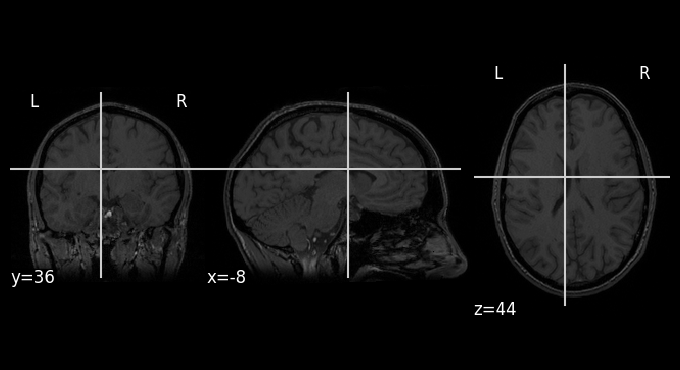

In [13]:
from nilearn import plotting

plotting.plot_anat("/content/dicomdata/nifti_nipype-2/1010_brain_mr_02_lee_T1_AX_20080801000000_2.nii.gz")

## Resources

[The NIFTI file format](https://brainder.org/2012/09/23/the-nifti-file-format/): Comprehensive overview of the contents of the Nifti file format

[MRI analysis in Python using Nipype, Nilearn and more](https://peerherholz.github.io/workshop_weizmann/index.html): Very neat Jupyter book covering different aspects of MRI analysis in Python (by [by Peer Herholz](https://peerherholz.github.io)). Also includes a nice [presentation](https://docs.google.com/presentation/d/e/2PACX-1vSuwfkKyYh0qMZzRO4vM0lG6A2XGA_JxQxGl1Cw_wSyK40jaceCg-emUJQxB-49VMMcAXadd4WKgMJv/embed?start=false&amp;loop=false&amp;delayms=3000&amp;usp=embed_facebook&slide=id.g8074ffaf2c_0_0) on Nipype and the ecosystem around it

[Dartbrains](https://dartbrains.org/content/intro.html): Very comprehensive course on fMRI analysis using Python, covering mathematical/statistical fundamentals (by [Luke Chang](http://www.lukejchang.com))

[NiPraxis](https://textbook.nipraxis.org/intro.html): Another course going very deep and covering both practise and theory of brain imaging.

[Neuroimaging and Data Science](https://neuroimaging-data-science.org/root.html): "Introduction to contemporary data science and its application in neuroimaging research" (by Ariel Rokem & Tal Yarkoni). Again, going way deeper than the scope of our course.

## References

Michael Joseph, Jerrold Jeyachandra, and Erin Dickie (eds):
"Data Carpentry: Introduction to MRI Data Analysis." Version 2019.11, November 2019,
https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI
